<a href="https://colab.research.google.com/github/valeriafigueredo-data/Analise_e_visualizacao_dados_cesar_school/blob/main/SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Segundo Trabalho da Disciplina de Análise e Visualização de Dados**

Professor: Eronides da Silva Neto

Aluno 01: Gabriel De Paula Leite

Aluno 02: Kauã Marques de Barros Silva

Aluno 03: Luiz Sergio Sieber Padilla

Aluno 04: Valéria Cristina A. R. de Figueredo

O objetivo do presente trabalho é realizar visualizações, com Plotly no dataset escolhido (Superstore). Também tiveram visualizações com Pandas e Numpy.

# **Contexto**


O Dataset Superstore trata sobre os dados de uma rede de supermercado grande, localizada em diversos estados dos Estados Unidos. Vende inúmeros produtos, tais quais utensílios domésticos, roupas e produtos elétricos, bem como alimentos.
É um dataset fictício que pode levantar questões como: quais as áreas fracas onde você pode trabalhar para obter mais lucro. E quais são os problemas de negócios que é possível verificar explorando os dados?

# **Dicionário**

  **Coluna**        **Significado**    

* **Ship Mode:**        Modo de entrega do produto

* **Segment:**       Segmento                   

* **Country:**       País                      

* **City:**          Cidade                     

* **State:**         Estado                    

* **Postal Code:**   Código Postal               

* **Region:**        Região                      

* **Category:**      Categoria                  

* **Sub-Category:**  Sub Categoria              

* **Sales:**         Vendas                     

* **Quantity:**      Quantidade                

* **Discount:**      Desconto                   

* **Profit:**        Lucro                     


* **Dataframe:** https://www.kaggle.com/datasets/itssuru/super-store/data

* **CRIAÇÃO DO DATAFRAME:** 2021

# **1. Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

!pip install pgeocode
import pgeocode

# **2. Dataframe**

In [2]:
df_store = pd.read_csv('https://raw.githubusercontent.com/valeriafigueredo-data/Analise_e_visualizacao_dados_cesar_school/main/pandas/SampleSuperstore.csv')

# **3. Análise Exploratória**

In [3]:
df_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# **4. Limpeza dos Dados e AED**

## Rename Columns


In [5]:
df_store = df_store.rename(columns={
    'Ship Mode': 'Modo de Envio',
    'Segment': 'Segmento',
    'City': 'Cidade',
    'State': 'Estado',
    'Postal Code': 'Código Postal',
    'Region': 'Região',
    'Category': 'Categoria',
    'Sub-Category': 'Subcategoria',
    'Sales': 'Vendas',
    'Quantity': 'Quantidade',
    'Discount': 'Desconto',
    'Profit': 'Lucro'
})

## Coluna 0 - Ship Mode

In [6]:
df_store['Modo de Envio'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
df_store.replace({'Second Class': 'Segunda Classe', 'Standard Class': 'Classe Padrão', 'First Class': 'Primeira Classe', 'Same Day':'Mesmo Dia'}, inplace=True)
df_store['Modo de Envio'].unique()

array(['Segunda Classe', 'Classe Padrão', 'Primeira Classe', 'Mesmo Dia'],
      dtype=object)

## Coluna 01 - Segment

In [8]:
df_store['Segmento'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
df_store.replace({'Consumer': 'Consumidor', 'Corporate': 'Corporativo'}, inplace=True)
df_store['Segmento'].unique()

array(['Consumidor', 'Corporativo', 'Home Office'], dtype=object)

## Coluna 02 - Country

###Essa coluna foi removida, pois ela só apresenta um único país

In [10]:
df_store['Country'].unique()

array(['United States'], dtype=object)

In [11]:
df_store.drop('Country', axis=1, inplace=True)

## Coluna 03 - City

In [12]:
df_store['Cidade'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

## Coluna 04 - State

In [13]:
df_store['Estado'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

## Coluna 05 - Postal Code

In [14]:
df_store['Código Postal'].describe()

,Código Postal
count,9994.000000
mean,55190.379428
std,32063.693350
min,1040.000000
25%,23223.000000
50%,56430.500000
75%,90008.000000
max,99301.000000


## Coluna 06 - Region

In [15]:
df_store['Região'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
df_store.replace({'West': 'Oeste', 'East': 'Leste', 'Central': 'Central', 'South': 'Sul'}, inplace=True)
df_store['Região'].unique()

array(['Sul', 'Oeste', 'Central', 'Leste'], dtype=object)

## Coluna 07 - Category

In [17]:
df_store['Categoria'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [18]:
df_store.replace({'Office Supplies': 'Itens de Escritório', 'Furniture': 'Mobílias', 'Technology': 'Técnologia'}, inplace=True)
df_store['Categoria'].unique()

array(['Mobílias', 'Itens de Escritório', 'Técnologia'], dtype=object)

## Coluna 08 - Sub-Category

In [19]:
df_store['Subcategoria'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [20]:
df_store.replace({
    'Bookcases': 'Estantes',
    'Chairs': 'Cadeiras',
    'Labels': 'Etiquetas',
    'Tables': 'Mesas',
    'Storage': 'Armazenamento',
    'Furnishings': 'Mobiliário',
    'Art': 'Arte',
    'Phones': 'Telefones',
    'Binders': 'Ficharios',
    'Appliances': 'Eletrodomésticos',
    'Paper': 'Papel',
    'Accessories': 'Acessórios',
    'Envelopes': 'Envelopes',
    'Fasteners': 'Fixadores',
    'Supplies': 'Suprimentos',
    'Machines': 'Máquinas',
    'Copiers': 'Copiadoras'
}, inplace=True)
df_store['Subcategoria'].unique()

array(['Estantes', 'Cadeiras', 'Etiquetas', 'Mesas', 'Armazenamento',
       'Mobiliário', 'Arte', 'Telefones', 'Ficharios', 'Eletrodomésticos',
       'Papel', 'Acessórios', 'Envelopes', 'Fixadores', 'Suprimentos',
       'Máquinas', 'Copiadoras'], dtype=object)

## Coluna 09 - Sales

In [21]:
df_store['Vendas'].describe()

,Vendas
count,9994.000000
mean,229.857901
std,623.245124
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


In [22]:
filtro = df_store['Vendas'] > 5000
df_store[filtro]

,Modo de Envio,Segmento,Cidade,Estado,Código Postal,Região,Categoria,Subcategoria,Vendas,Quantidade,Desconto,Lucro
165,Classe Padrão,Consumidor,San Antonio,Texas,78207,Central,Técnologia,Máquinas,8159.952,8,0.4,-1359.9920
509,Classe Padrão,Consumidor,Atlanta,Georgia,30318,Sul,Itens de Escritório,Ficharios,6354.950,5,0.0,3177.4750
683,Mesmo Dia,Corporativo,Burlington,North Carolina,27217,Sul,Técnologia,Máquinas,7999.980,4,0.5,-3839.9904
2505,Segunda Classe,Consumidor,San Francisco,California,94122,Oeste,Itens de Escritório,Suprimentos,8187.650,5,0.0,327.5060
2623,Primeira Classe,Home Office,New York City,New York,10024,Leste,Técnologia,Copiadoras,11199.968,4,0.2,3919.9888
2697,Classe Padrão,Home Office,Jacksonville,Florida,32216,Sul,Técnologia,Máquinas,22638.480,6,0.5,-1811.0784
4098,Classe Padrão,Consumidor,Minneapolis,Minnesota,55407,Central,Itens de Escritório,Ficharios,9449.950,5,0.0,4630.4755
4190,Classe Padrão,Consumidor,Newark,Delaware,19711,Leste,Técnologia,Copiadoras,10499.970,3,0.0,5039.9856
4277,Classe Padrão,Corporativo,Lakewood,New Jersey,8701,Leste,Técnologia,Máquinas,9099.930,7,0.0,2365.9818
6340,Classe Padrão,Corporativo,New York City,New York,10035,Leste,Técnologia,Máquinas,5199.960,4,0.0,1351.9896


## Coluna 10 - Quantity

In [23]:
df_store['Quantidade'].describe()

,Quantidade
count,9994.000000
mean,3.789574
std,2.225110
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,14.000000


## Coluna 11 - Discount

In [24]:
df_store['Desconto'].describe()

,Desconto
count,9994.000000
mean,0.156203
std,0.206452
min,0.000000
25%,0.000000
50%,0.200000
75%,0.200000
max,0.800000


## Coluna 12 - Profit

In [25]:
df_store['Lucro'].describe()

,Lucro
count,9994.000000
mean,28.656599
std,234.260115
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


In [26]:
df_store.to_csv('SuperStore.csv', index=False)

In [27]:
df_store.head()

,Modo de Envio,Segmento,Cidade,Estado,Código Postal,Região,Categoria,Subcategoria,Vendas,Quantidade,Desconto,Lucro
0,Segunda Classe,Consumidor,Henderson,Kentucky,42420,Sul,Mobílias,Estantes,261.9600,2,0.00,41.9136
1,Segunda Classe,Consumidor,Henderson,Kentucky,42420,Sul,Mobílias,Cadeiras,731.9400,3,0.00,219.5820
2,Segunda Classe,Corporativo,Los Angeles,California,90036,Oeste,Itens de Escritório,Etiquetas,14.6200,2,0.00,6.8714
3,Classe Padrão,Consumidor,Fort Lauderdale,Florida,33311,Sul,Mobílias,Mesas,957.5775,5,0.45,-383.0310
4,Classe Padrão,Consumidor,Fort Lauderdale,Florida,33311,Sul,Itens de Escritório,Armazenamento,22.3680,2,0.20,2.5164


# **5. Visualizações Dinâmicas com Plotly**

## 5.1 Vendas Por Cidade (Mapa)

O objetivo desse mapa é demonstrar o total de vendas por cidade, o que permite tomar decisões estretégicas nos setores de recursos humanos, marketing (preço, produto, promoção, ponto de venda) a fim de melhorar as vendas dos produtos da empresa e atender as necessidades do consumidor.

In [28]:
# Agrupamento e soma das vendas por cidade, estado e código postal
sales_by_city_state = df_store.groupby(['Estado', 'Cidade', 'Código Postal'])['Vendas'].sum().reset_index()

# Uso do pgeocode para obter as coordenadas a partir dos códigos postais
nomi = pgeocode.Nominatim('us')

# Função para obter coordenadas de um código postal
def get_coordinates(postal_code):
    location = nomi.query_postal_code(postal_code)
    if location is not None:
        return pd.Series([location.latitude, location.longitude])
    else:
        return pd.Series([None, None])

# Aplicação da função e adicionando as coordenadas ao DataFrame
sales_by_city_state[['Latitude', 'Longitude']] = sales_by_city_state['Código Postal'].apply(get_coordinates)

# Filtro das linhas com coordenadas válidas
sales_by_city_state = sales_by_city_state.dropna(subset=['Latitude', 'Longitude'])

# Criar o gráfico de mapa
fig = px.scatter_geo(sales_by_city_state,
                     lat='Latitude',
                     lon='Longitude',
                     color='Vendas',
                     hover_name='Cidade',
                     hover_data={'Estado': True, 'Vendas': True},
                     size='Vendas',
                     size_max=50,  # Ajuste o tamanho máximo dos pontos
                     color_continuous_scale='Viridis',  # Paleta de cores
                     scope='usa',
                     projection='albers usa',
                     title='Total de Vendas por Cidade e Estado nos EUA')

# Ajuste do tamanho e do estilo do texto do título
fig.update_layout(
    title={'text': 'Total de Vendas por Cidade nos EUA',
           'font': {'size': 36, 'family': 'Arial'}},  # Ajuste o tamanho e a família da fonte
    width=1200,  # Largura do gráfico em pixels
    height=800   # Altura do gráfico em pixels
)

# Mostrar o gráfico
fig.show()

## 5.2 Gráfico de Barras Horizontais - Total de Vendas Por Estado

Esse gráfico de barras horizontais tem o objetivo de estabelecer em ordem decrescente o total de vendas por estado.

In [29]:
# Agrupamento das vendas por estado
sales_by_state = df_store.groupby('Estado')['Vendas'].sum().reset_index()

# Ordenamento dos valores de vendas em ordem decrescente
sales_by_state = sales_by_state.sort_values(by='Vendas', ascending=True)

# Gráfico de barras por estado
fig = px.bar(sales_by_state, x='Vendas', y='Estado', title='Total de Vendas por Estado', orientation='h')

# Ajustar o tamanho do gráfico e a visibilidade
fig.update_layout(
    width=1400,  # Largura do gráfico em pixels
    height=800,  # Altura do gráfico em pixels
    title={'text': 'Total de Vendas por Estado', 'font': {'size': 24}},  # Ajustar o tamanho do texto do título
    xaxis_title='Vendas',
    yaxis_title='Estado',
    xaxis=dict(tickformat=".2s"),  # Formatar os valores do eixo x para facilitar a leitura
    bargap=0.2  # Ajustar o espaço entre as barras
)

# Mostrar o gráfico
fig.show()

## 5.3 Gráfico de Dispersão - Vendas x Lucro Por Categoria

Esse gráfico de dispersão tem a finalidade de demonstrar a relação entre as vendas e o lucro por categoria. Tal segmentação permite verificar quais categorias estão dando lucro/prejuízo, assim como implementar decisões estratégicas por setor.

In [30]:
# Gráfico de dispersão entre vendas e lucro
fig = px.scatter(df_store, x='Vendas', y='Lucro', color='Categoria', title='Relação entre Vendas e Lucro por Categoria')

# Atualizar o layout para alterar o tamanho da figura
fig.update_layout(
    width=1300,  # Largura da figura
    height=500  # Altura da figura
)


fig.show()

## 5.4 Heatmap de Correlação - Vendas, Lucros e Descontos

Esse heatmap tem a finalidade de demonstrar a correlação entre vendas, lucro e descontos. Os insights podem melhorar as estratégias de marketing e vendas. Por exemplo, caso haja uma alta correlação entre descontos e vendas, uma decisão de marketing para a área promocional da empresa seria ampliar descontos, por exemplo.

In [31]:
import plotly.graph_objects as go

# Calcular a matriz de correlação
correlation_matrix = df_store[['Vendas', 'Lucro', 'Desconto']].corr()

# Criar o mapa de calor com valores de correlação no centro de cada célula
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Greens',
    colorbar=dict(title='Correlação'),
    text=correlation_matrix.values,
    texttemplate='%{text:.2f}',
    textfont=dict(size=14)
))

# Atualizar o layout para alterar o tamanho da figura
fig.update_layout(
    title='Mapa de Calor - Correlação entre Venda, Lucro e Desconto',
    width=600,  # Largura da figura
    height=600  # Altura da figura
)

# Mostrar o gráfico
fig.show()

## 5.5 BoxPlot

Este gráfico tem como objetivo verificar os elementos interquartis e os outliers das vendas entre as 4 regiões dos EUA.

In [32]:
 # Criação do boxplot com Plotly
fig = px.box(df_store, x='Região', y='Vendas', title='Boxplot das Vendas por Região')

# Ajustando a visualização dos elementos internos
fig.update_traces(
    boxmean=True,  # Mostra a linha da média
    boxpoints='outliers',  # Exibe todos os pontos dos dados, incluindo outliers
    marker=dict(color='blue', size=4),  # Define cor e tamanho dos pontos dos outliers
    line=dict(width=1)  # Aumenta a largura da linha da caixa
)

# Layout
fig.update_layout(
    xaxis_title='Região',
    yaxis_title='Vendas',
    font=dict(
        size=16,  # Tamanho da fonte
    ),
    width=1200,  # Largura do gráfico
    height=800,  # Altura do gráfico
    margin=dict(
        l=120,  # Margem esquerda
        r=120,  # Margem direita
        b=150,  # Margem inferior
        t=100,  # Margem superior
        pad=4  # Espaçamento entre o gráfico e o título
    ),
    showlegend=False  # Oculta a legenda para este exemplo específico
)

# Exibindo o gráfico
fig.show()

# **6. AED e Visualizações Estatísticas - Extra**

## 6.1 Gráfico De Dispersão Entre Lucro E Vendas Gerais

O objetivo do presente gráfico é demonstrar a relação entre as variáveis lucro e vendas para todos os objetos comercializados.

A correlação entre as colunas é: 0.4790646301601439


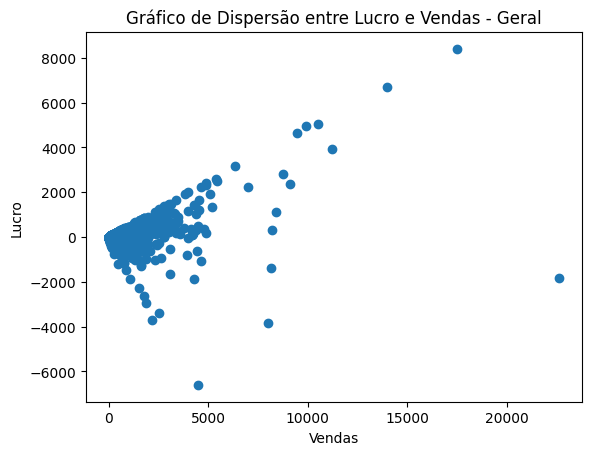

In [33]:

# Calculando a correlação entre as duas colunas
corr_lucro_vendas = df_store['Lucro'].corr(df_store['Vendas'])

# Imprimindo o valor da correlação
print(f'A correlação entre as colunas é: {corr_lucro_vendas}')

# Plotando o gráfico de dispersão para visualizar a correlação
plt.scatter(df_store['Vendas'], df_store['Lucro'])
plt.title('Gráfico de Dispersão entre Lucro e Vendas - Geral')
plt.xlabel('Vendas')
plt.ylabel('Lucro')
plt.show()

## 6.2 Gráfico De Dispersão Entre Lucro E Vendas - Segmento Home Office

O objetivo desse gráfico de dispersão é demonstrar a relação entre as variáveis lucro e venda, apenas para o segmento Home Office.

In [34]:
mask = (df_store['Segmento'] == 'Home Office')
# array(['Consumidor', 'Corporativo', 'Home Office'], dtype=object)
df_mask = df_store[mask]

A correlação entre as colunas é: 0.29609858628814795


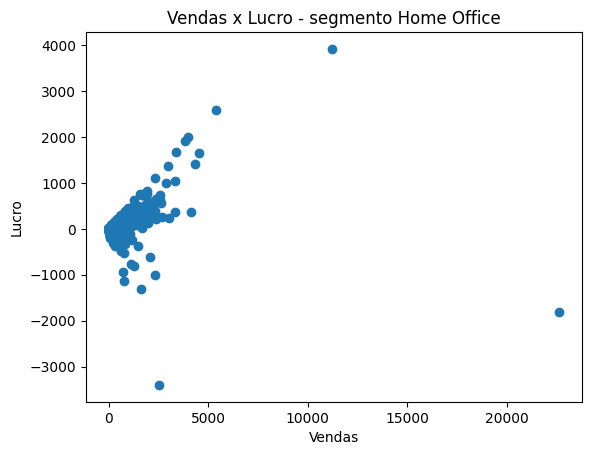

In [35]:
# Calculando a correlação entre as duas colunas
corr_lucro_vendasx = df_mask['Lucro'].corr(df_mask['Vendas'])

# Imprimindo o valor da correlação
print(f'A correlação entre as colunas é: {corr_lucro_vendasx}')

# Plotando o gráfico de dispersão para visualizar a correlação
plt.scatter(df_mask['Vendas'], df_mask['Lucro'])
plt.title('Vendas x Lucro - segmento Home Office')
plt.xlabel('Vendas')
plt.ylabel('Lucro')
plt.show()

In [36]:
y = df_store['Vendas'] > 20000
df_store[y]

,Modo de Envio,Segmento,Cidade,Estado,Código Postal,Região,Categoria,Subcategoria,Vendas,Quantidade,Desconto,Lucro
2697,Classe Padrão,Home Office,Jacksonville,Florida,32216,Sul,Técnologia,Máquinas,22638.48,6,0.5,-1811.0784


## 6.3 Gráfico De Coluna Vertical - Lucratividade E Perda Por Categoria

O Objetivo desse gráfico de coluna vertical é demonstrar a lucratividade e as perdas por categoria.

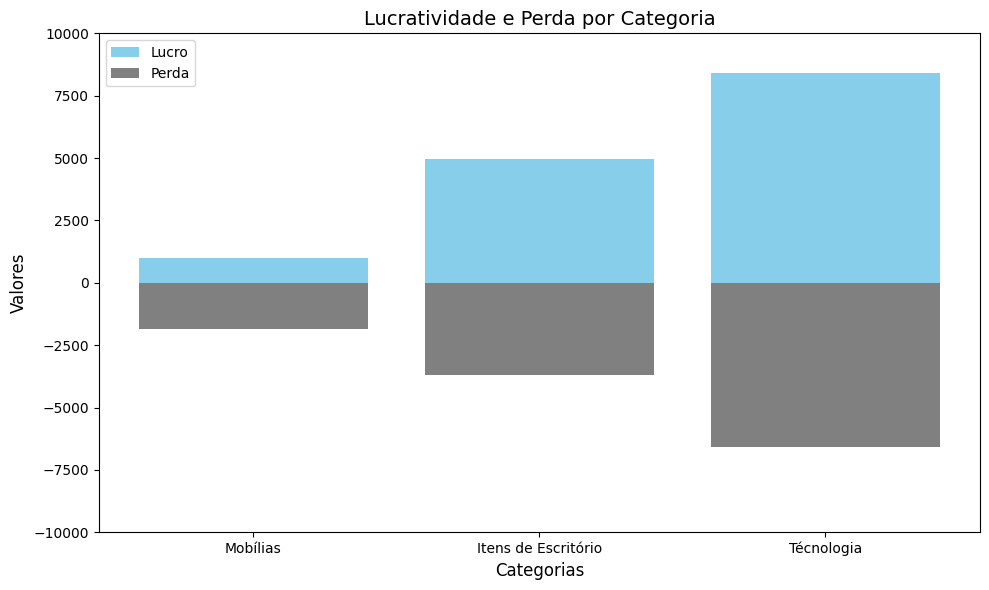

In [37]:
# Criação do gráfico de colunas
plt.figure(figsize=(10, 6))

# Estruturação das barras para os valores positivos
plt.bar(df_store['Categoria'], df_store['Lucro'].clip(lower=0), color='skyblue', label='Lucro')

# Estruturação das barras para as perdas
plt.bar(df_store['Categoria'], df_store['Lucro'].clip(upper=0), color='gray', label='Perda', bottom=df_store['Lucro'].clip(lower=0))

# Adicionar título e rótulos
plt.title('Lucratividade e Perda por Categoria', fontsize=14)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.ylim(-10000, 10000)  # Ajuste do eixo y

# Exibição do gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.show()

Melhor Compreeensão das categorias e subcategorias diante da Lucratividade e perda

In [38]:
df_lucro_up = df_store[df_store['Lucro'] > 0]
df_lucro_up['Categoria'].value_counts()

,count
Categoria,
Itens de Escritório,5111
Técnologia,1573
Mobílias,1374


In [39]:
df_lucro_up['Subcategoria'].value_counts()

,count
Subcategoria,
Papel,1370
Ficharios,910
Arte,796
Mobiliário,781
Telefones,751
Acessórios,683
Armazenamento,661
Eletrodomésticos,399
Etiquetas,364


In [40]:
df_lucro_low = df_store[df_store['Lucro'] < 0]
df_lucro_low['Categoria'].value_counts()

,count
Categoria,
Itens de Escritório,886
Mobílias,714
Técnologia,271


In [41]:
df_lucro_low['Subcategoria'].value_counts()

,count
Subcategoria,
Ficharios,613
Cadeiras,235
Mesas,203
Mobiliário,167
Armazenamento,161
Telefones,136
Estantes,109
Acessórios,91
Eletrodomésticos,67
